In [1]:
import torch
import random
import matplotlib.pyplot as plt

In [2]:
from preprocess import VerificationDataset, split_eval, OneshotDataset

In [3]:
random.seed(10)

In [4]:
backPath = './data/background'
evalPath = './data/evaluation'

In [5]:
dic_idxs_eval = split_eval(backPath, evalPath)

In [6]:
dic_idxs_eval

{'drawer': {'back': [2, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 19],
  'test': [0, 3, 1, 18],
  'valid': [17, 15, 13, 7]},
 'alphabet': {'test': [16, 15, 10, 2, 7, 11, 5, 0, 6, 19],
  'valid': [1, 3, 4, 8, 9, 12, 13, 14, 17, 18]}}

## Verification Dataset

In [7]:
BackgroundDataset = VerificationDataset(backPath, 6, 
                            dic_idxs_eval['drawer']['back'])

begin loading background dataset to the memory
6 samples are generated.


(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)


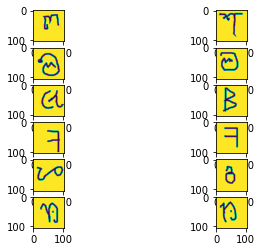

In [8]:
rows = len(BackgroundDataset)
for i in range(1,2*rows,2):
    img1, img2, label = BackgroundDataset[(i-1)/2]
    print(img1.shape, img2.shape)
    ax = plt.subplot(rows, 2, i)
    ax = plt.imshow(img1)
    ax = plt.subplot(rows, 2, i+1)
    ax = plt.imshow(img2)

## One-shot Learning Dataset

In [9]:
EvalDataset = OneshotDataset(evalPath, n_ways=20, idxs_eval=dic_idxs_eval, phase='valid')

begin loading valid dataset to the memory
400 samples are generated.


In [10]:
len(EvalDataset)

400

In [13]:
for i in range(2):
    trial = EvalDataset[i]
    print(trial)

{'ways': {0: './data/evaluation/Manipuri/character18/1336_8.png', 1: './data/evaluation/Manipuri/character33/1351_8.png', 2: './data/evaluation/Manipuri/character15/1333_8.png', 3: './data/evaluation/Manipuri/character16/1334_8.png', 4: './data/evaluation/Manipuri/character24/1342_8.png', 5: './data/evaluation/Manipuri/character13/1331_8.png', 6: './data/evaluation/Manipuri/character39/1357_8.png', 7: './data/evaluation/Manipuri/character12/1330_8.png', 8: './data/evaluation/Manipuri/character03/1321_8.png', 9: './data/evaluation/Manipuri/character01/1319_8.png', 10: './data/evaluation/Manipuri/character23/1341_8.png', 11: './data/evaluation/Manipuri/character11/1329_8.png', 12: './data/evaluation/Manipuri/character32/1350_8.png', 13: './data/evaluation/Manipuri/character30/1348_8.png', 14: './data/evaluation/Manipuri/character36/1354_8.png', 15: './data/evaluation/Manipuri/character10/1328_8.png', 16: './data/evaluation/Manipuri/character25/1343_8.png', 17: './data/evaluation/Manipuri